In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
df_pca = pd.read_csv('../data/heart_disease_pca.csv')
X_pca = df_pca.drop('target', axis=1)
y_pca = df_pca['target']

print(X_pca.head())
print(y_pca.head())

          0         1         2  ...         9        10        11
0  1.162722 -0.929622  3.212341  ... -0.453161  0.222642  0.497023
1  3.217830 -1.451021 -0.481532  ...  1.475782 -1.032829 -0.942472
2  3.143604  0.636569 -0.364301  ...  0.470704  0.340281  0.895176
3 -0.464908  1.409706  0.395323  ...  0.243848 -1.545183  0.170085
4 -2.268663 -0.388683 -0.068956  ...  0.553453  0.912098 -0.281023

[5 rows x 12 columns]
0    0
1    2
2    1
3    0
4    0
Name: target, dtype: int64


c:\Users\ehabk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ehabk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ehabk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ehabk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

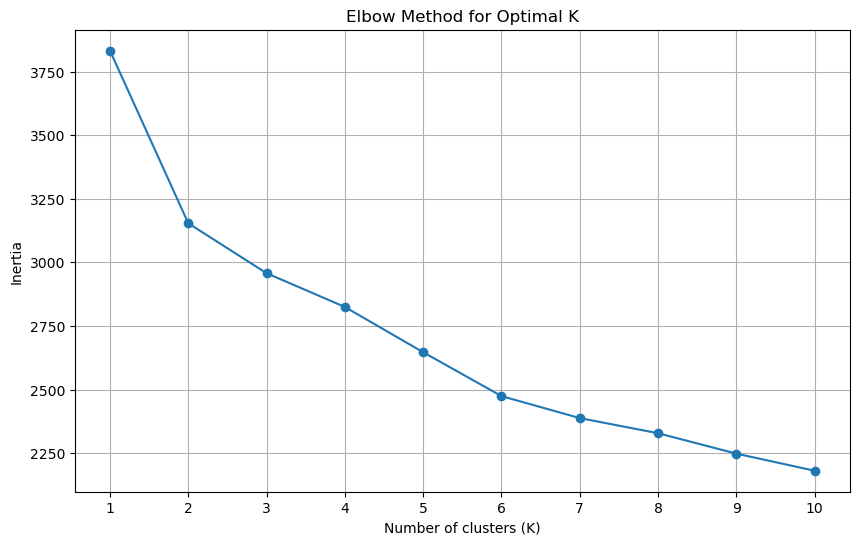

In [6]:
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()

In [19]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df_pca['Clusters'] = clusters

c:\Users\ehabk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


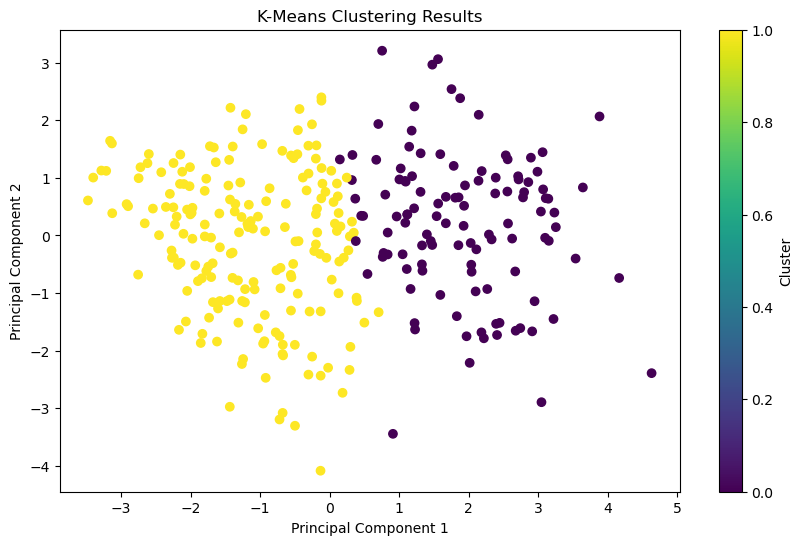

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

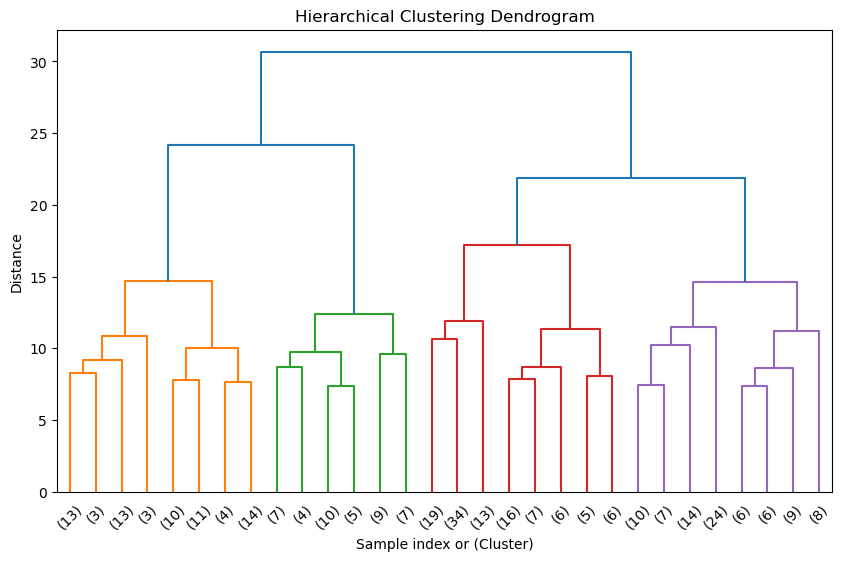

In [23]:
plt.figure(figsize=(10, 6))
linked = linkage(X_pca, method='ward')
dendrogram(linked, orientation='top', labels=df_pca['Clusters'].astype(str).values, distance_sort='descending', show_leaf_counts=True, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (Cluster)')
plt.ylabel('Distance')
plt.show()

In [24]:
# Saving the models
import joblib
joblib.dump(kmeans, '../models/kmeans.pkl')

print("Models Saved Successfully")

Models Saved Successfully
